In [1]:
import pandas as pd
import numpy as np
from  sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plot


In [2]:
df = pd.read_csv(r"C:\Users\10725880\Downloads\alerts-data.csv")
df.dropna(inplace=True)
# df.head(100)

In [3]:
from sklearn.cluster import k_means
from sympy import Product
from sklearn.calibration import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import vectorize
from sklearn import preprocessing

vect = TfidfVectorizer(ngram_range=(3,3))
x = vect.fit_transform(df['description'])
df = df[['description','kpi']]
df.dropna(inplace=True)
data_encoded  =pd.get_dummies(df,columns=['description','kpi'])
print(data_encoded)

      description_A failure occurred when executing a Windows service request. \n \n Service request: Start \n \n BizTalk host name: ThrottledReceiveHost \n Windows service name: BTSSvc$ThrottledReceiveHost \n \n Additional error information: \n Error code: 0x80131604 \n Error source: mscorlib \n Error description: Exception has been thrown by the target of an invocation.  \
0                                                 False                                                                                                                                                                                                                                                                                                                                  
1                                                 False                                                                                                                                                                                             

In [4]:
# scaler = StandardScaler(with_mean=False)
# scaled_data = scaler.fit_transform(x)

In [5]:
kmeans  = KMeans(n_clusters=5)
df['cluster'] = kmeans.fit_predict(data_encoded)

cd = df.groupby('cluster')
for i in cd:
    print(i)

C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0,                                             description                 kpi  \
13    This alert will write to the SolarWinds event ...  High Response Time   
15    This alert will write to the SolarWinds event ...  High Response Time   
16    This alert will write to the SolarWinds event ...  High Response Time   
17    This alert will write to the SolarWinds event ...  High Response Time   
181   This alert will write to the SolarWinds event ...  High Response Time   
...                                                 ...                 ...   
9638  This alert will write to the SolarWinds event ...  High Response Time   
9639  This alert will write to the SolarWinds event ...  High Response Time   
9640  This alert will write to the SolarWinds event ...  High Response Time   
9641  This alert will write to the SolarWinds event ...  High Response Time   
9683  This alert will write to the SolarWinds event ...  High Response Time   

      cluster  
13          0  
15          0  

C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

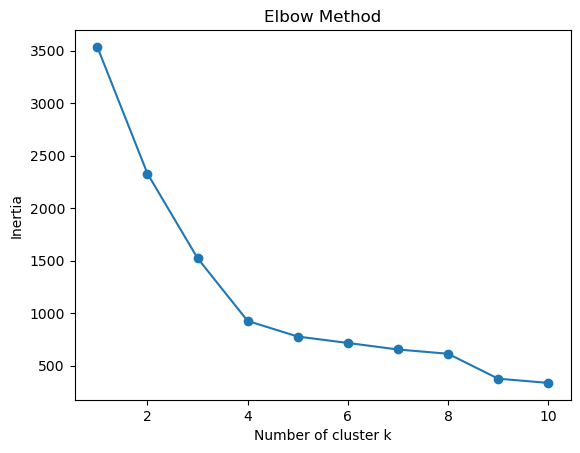

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of cluster k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

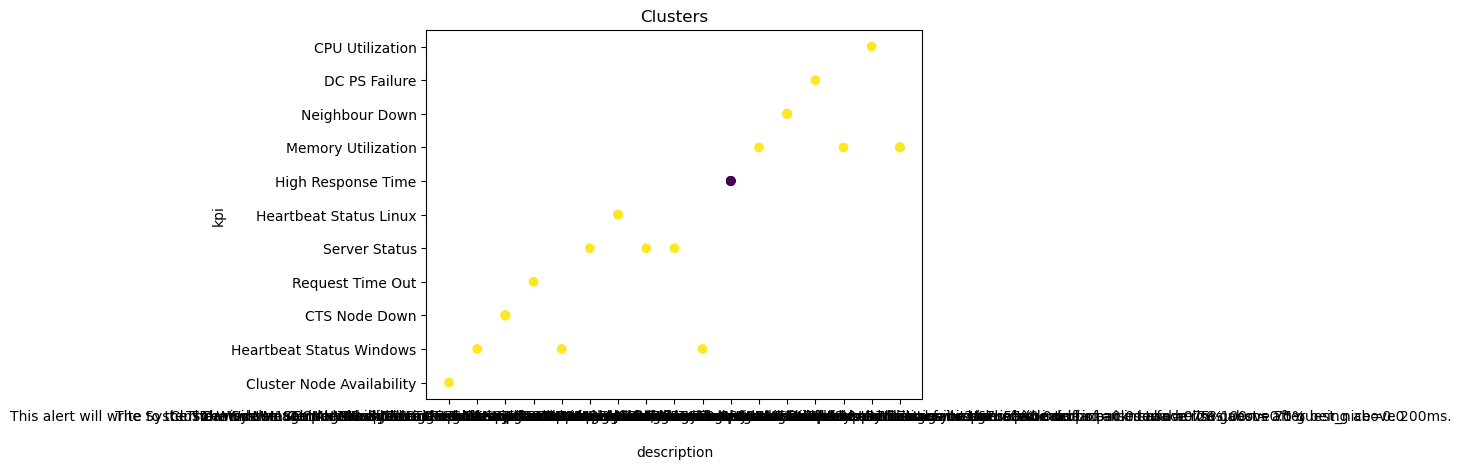

In [7]:

plt.scatter(df['description'].head(30),df['kpi'].head(30),c=df['cluster'].head(30),cmap='viridis')
plt.xlabel('description')
plt.ylabel('kpi')
plt.title('Clusters')
plt.show()

In [8]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd


In [24]:
transaction = [['accessories','bike','clothing','car'],
               ['bike','clothing','shoes','grape'],
               ['accessories','bike','clothing','shoes'],
               ['bike','clothing','car','shoes']]


In [25]:
te = TransactionEncoder()
te_ary = te.fit_transform(transaction)
print(te_ary)

[[ True  True  True  True False False]
 [False  True False  True  True  True]
 [ True  True False  True False  True]
 [False  True  True  True False  True]]


In [26]:
te.columns_

['accessories', 'bike', 'car', 'clothing', 'grape', 'shoes']

In [28]:
df = pd.DataFrame(te_ary,columns = te.columns_)

In [29]:
from sklearn import metrics


freq_itemsets = apriori(df,min_support=0.3,use_colnames=True)
rules = association_rules(freq_itemsets,metric='confidence',min_threshold=0.7)

In [22]:
print(freq_itemsets)
print(rules)

    support                             itemsets
0       0.5                      (0_accessories)
1       0.5                             (0_bike)
2       0.5                             (1_bike)
3       0.5                         (1_clothing)
4       0.5                         (2_clothing)
5       0.5                            (3_shoes)
6       0.5              (0_accessories, 1_bike)
7       0.5          (0_accessories, 2_clothing)
8       0.5                 (0_bike, 1_clothing)
9       0.5                 (2_clothing, 1_bike)
10      0.5  (0_accessories, 2_clothing, 1_bike)
                    antecedents                  consequents  \
0               (0_accessories)                     (1_bike)   
1                      (1_bike)              (0_accessories)   
2               (0_accessories)                 (2_clothing)   
3                  (2_clothing)              (0_accessories)   
4                      (0_bike)                 (1_clothing)   
5                  (1_clothi

In [41]:
data = pd.DataFrame({
    'TransactionID': [1,2,3,4,5,6,7,8,9,10],
    'Date': ['2023-01-01','2023-01-01','2023-01-02','2023-01-02','2023-01-03','2023-01-03','2023-01-04','2023-01-04',
            '2023-01-05','2023-01-05'
            ],
    'Product':['A','B','B','C','A','B','A','C','A','B']
})


data


TransactionID        Date Product
0              1  2023-01-01       A
1              2  2023-01-01       B
2              3  2023-01-02       B
3              4  2023-01-02       C
4              5  2023-01-03       A
5              6  2023-01-03       B
6              7  2023-01-04       A
7              8  2023-01-04       C
8              9  2023-01-05       A
9             10  2023-01-05       B

In [42]:
data = data.set_index('Date')
data1 = data.drop("TransactionID",axis='columns')
data1 = pd.get_dummies(data1)
print(data1)

            Product_A  Product_B  Product_C
Date                                       
2023-01-01       True      False      False
2023-01-01      False       True      False
2023-01-02      False       True      False
2023-01-02      False      False       True
2023-01-03       True      False      False
2023-01-03      False       True      False
2023-01-04       True      False      False
2023-01-04      False      False       True
2023-01-05       True      False      False
2023-01-05      False       True      False


In [45]:
data2 =data1.groupby('Date').sum()
data2

Product_A  Product_B  Product_C
Date                                       
2023-01-01          1          1          0
2023-01-02          0          1          1
2023-01-03          1          1          0
2023-01-04          1          0          1
2023-01-05          1          1          0

In [47]:
freq_itemsets = apriori(data2,min_support=0.2,use_colnames=True)
rules = association_rules(freq_itemsets,metric='confidence',min_threshold=0.7)
print(freq_itemsets)
print(rules)

   support                itemsets
0      0.8             (Product_A)
1      0.8             (Product_B)
2      0.4             (Product_C)
3      0.6  (Product_A, Product_B)
4      0.2  (Product_A, Product_C)
5      0.2  (Product_C, Product_B)
   antecedents  consequents  antecedent support  consequent support  support  \
0  (Product_A)  (Product_B)                 0.8                 0.8      0.6   
1  (Product_B)  (Product_A)                 0.8                 0.8      0.6   

   confidence    lift  leverage  conviction  zhangs_metric  
0        0.75  0.9375     -0.04         0.8          -0.25  
1        0.75  0.9375     -0.04         0.8          -0.25  


C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
